# Naive Bayes Classification Social_Network_Ads

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [6]:
#Read the data
df = pd.read_csv("Social_Network_Ads.csv")
# showing the first 5 lines of the data!
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.shape

(400, 5)

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
#check for null values
pd.isnull(df).sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
# chek if is age <0 or = 0
df[df["Age"]<0]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [11]:
# Drop User ID we don't need it
df.drop(["User ID"],axis = 1, inplace = True)

In [12]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [23]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [25]:
# encoding "Gender" Column
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


0    257
1    143
Name: Purchased, dtype: int64

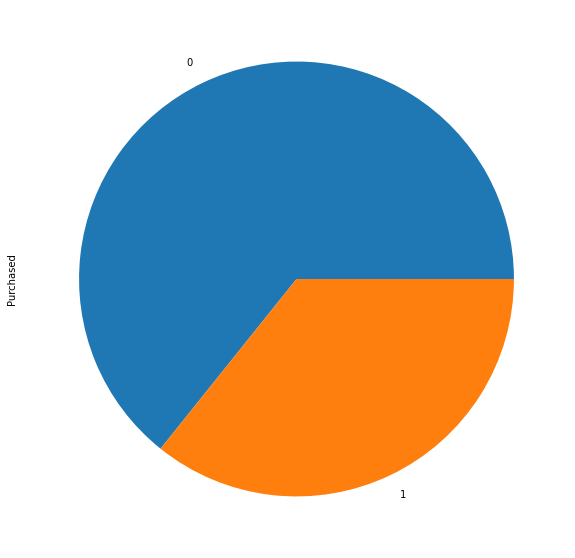

In [13]:
df["Purchased"].value_counts().plot(kind="pie",figsize=(10,10))
df["Purchased"].value_counts()

<AxesSubplot:>

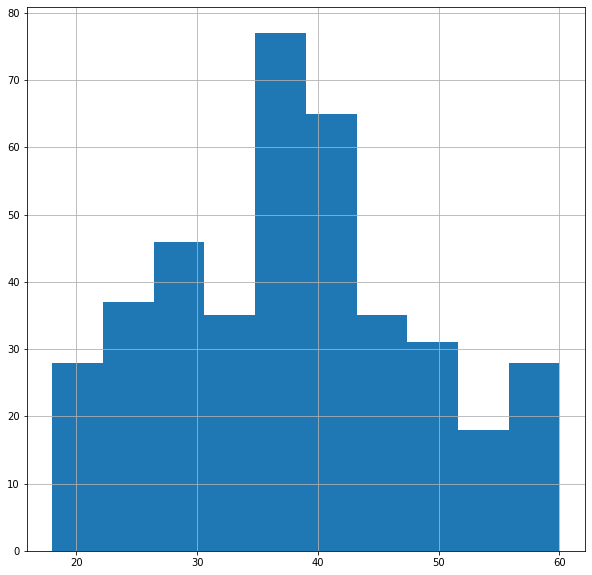

In [15]:
df["Age"].hist(label=" Age", figsize=(10,10))

<AxesSubplot:>

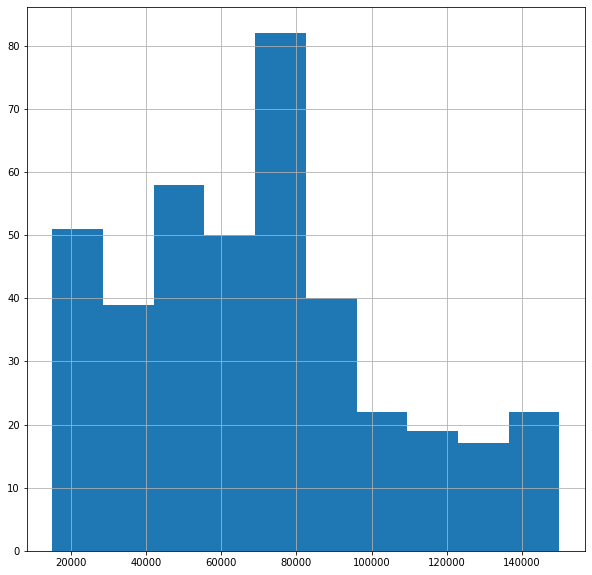

In [16]:
df["EstimatedSalary"].hist(label=" EstimatedSalary", figsize=(10,10))

<AxesSubplot:>

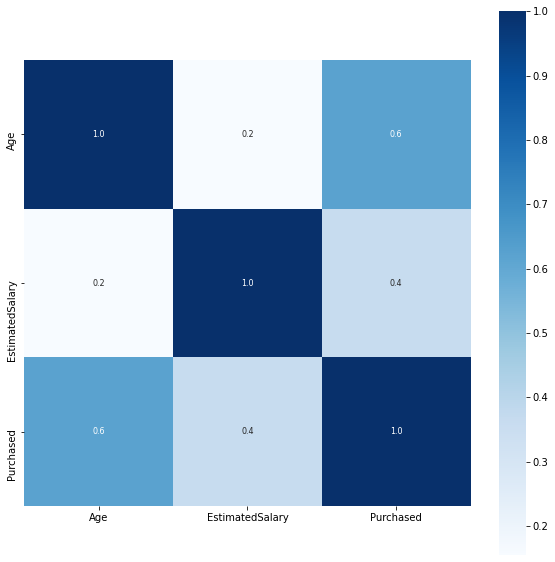

In [17]:
correlation = df.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [27]:
X = df.drop(['Purchased'], axis=1)# features 
Y = df['Purchased'] # target 
print(X)
print(Y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=0)
# Training dataset
print(X_train.shape)
print(y_train.shape)
# Testing dataset
print(X_test.shape)
print(y_test.shape)

(340, 3)
(340,)
(60, 3)
(60,)


## naive_bayes

In [37]:
model = MultinomialNB()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[38  9]
 [ 7  6]]


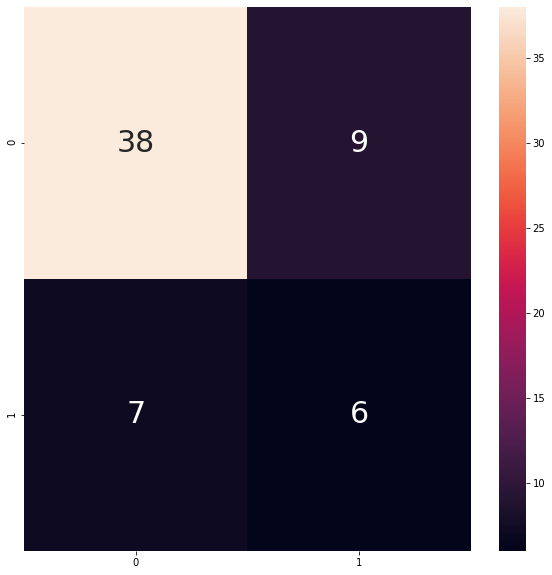

In [38]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [39]:
# Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces   
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]   
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


True Positives: 6
True Negatives: 38
False Positives: 9
False Negatives: 7
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.46
Specificity: 0.81
Precision: 0.81
f_1 Score: 0.59


## LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[45 15]
 [ 0  0]]


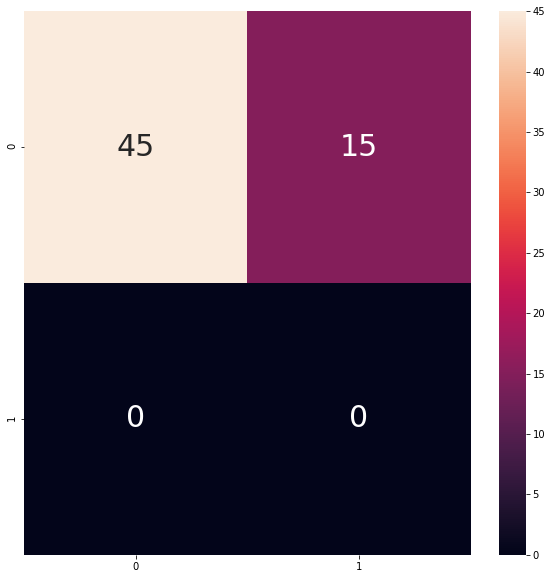

In [33]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [34]:
# Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces   
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]   
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


True Positives: 0
True Negatives: 45
False Positives: 15
False Negatives: 0
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: nan
Specificity: 0.75
Precision: 0.75
f_1 Score: nan


<ipython-input-34-a2ff3779a405>:18: RuntimeWarning: invalid value encountered in true_divide
  conf_sensitivity = (TP / float(TP + FN))


## <a id='conclusions'></a>
## Conclusions:

###### naive_bayes is the better model for this data.